In [18]:
# Import Dataset and Preprocess Images
from keras.datasets import mnist
(x_train,_), (x_test,_) = mnist.load_data()

In [19]:
import matplotlib.pyplot as plt
import numpy as np
x_train = np.append(x_train,x_test[0:9000],axis=0)
x_test = x_test[9001:10000]

x_train_noisy = x_train + 150 * np.random.normal(0,1,size=(28,28))
x_test_noisy = x_test + 150 * np.random.normal(0,1,size=(28,28))

x_train = np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))

x_train_noisy = np.reshape(x_train_noisy,(len(x_train),28,28,1))
x_test_noisy = np.reshape(x_test_noisy,(len(x_test),28,28,1))

x_train_noisy = x_train_noisy.astype('float32')/255
x_test_noisy = x_test_noisy.astype('float32')/255

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

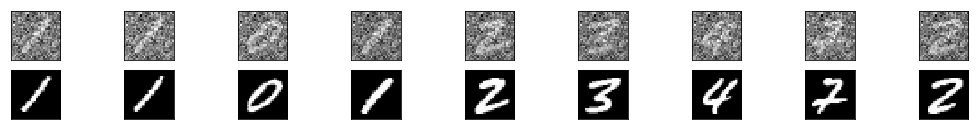

In [20]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [21]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Input,UpSampling2D,Conv2DTranspose
input_layer = Input(shape=(28,28,1))
layer = Conv2D(20,3,padding='same',activation='relu',use_bias=True)(input_layer)
layer = MaxPooling2D(2,padding='same')(layer)
layer = Conv2D(10,3,padding='same',activation='relu',use_bias=True)(layer)

encoded = MaxPooling2D(2,padding='same')(layer)

dLayer = UpSampling2D(2)(encoded)
dLayer = Conv2DTranspose(10,3,padding='same',activation='relu')(dLayer)
dLayer = UpSampling2D(2)(dLayer)
dLayer = Conv2DTranspose(20,3,padding='same',activation='relu')(dLayer)

decoded = Conv2DTranspose(1,3,padding='same',activation='sigmoid')(dLayer)

In [22]:
from keras.models import Model
encoderModel = Model(input_layer, encoded)

deNoiser = Model(input_layer, decoded)
deNoiser.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 10)        1810      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 10)          0         
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 14, 14, 10)        910       
__________

In [23]:
deNoiser.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
deNoiser.fit(x_train_noisy,x_train,
            shuffle=True,
            batch_size=256,
            epochs=2)

Epoch 1/2
69000/69000 [==============================] - 202s 3ms/step - loss: 0.1824 - acc: 0.7969
Epoch 2/2
69000/69000 [==============================] - 187s 3ms/step - loss: 0.1092 - acc: 0.8113


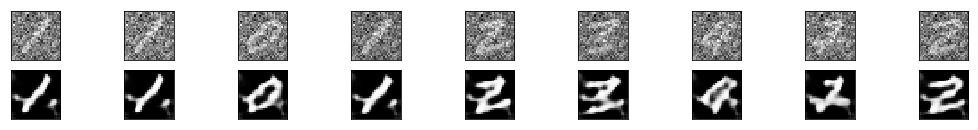

In [26]:
predictions = deNoiser.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [32]:
np.random.rand(1)[0]

0.7590531183016562